In [3]:
import pypsa 
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Set parameter Username
Set parameter LicenseID to value 2769009
Academic license - for non-commercial use only - expires 2027-01-22


INFO:pypsa.network.io:New version 1.1.0 available! (Current: 1.0.7)
INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, carriers, generators, lines, links, loads, storage_units, stores, sub_networks


{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x1a8062ab620>},
 'branches': {'Link': <matplotlib.collections.LineCollection at 0x1a8103e4d70>,
  'Line': <matplotlib.collections.LineCollection at 0x1a80634dbd0>},
 'flows': {}}

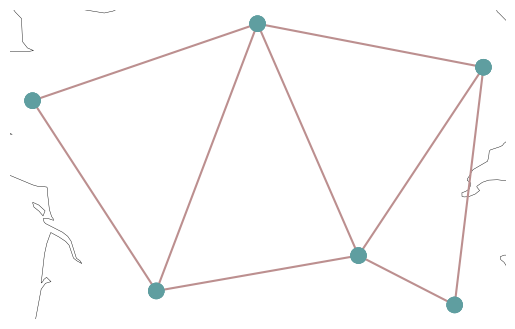

In [4]:
n = pypsa.Network("../results/FR_2020-08_6_clusters_2030/networks/base_s_6_elec_.nc")
# n = pypsa.Network("../results/FR_2013_15_clusters_2050/networks/base_s_15_elec_.nc")
# n = pypsa.Network("../results/DE_2013_15_clusters_2050/networks/base_s_15_elec_.nc") 
n.plot()

In [5]:
# total installed generator capacity by carrier
print(n.generators.groupby("carrier")["p_nom"].sum().round(2).sort_values(ascending=False))

carrier
nuclear          65690.00
onwind           24248.80
solar            13238.30
CCGT             10212.70
ror               7126.21
offwind-ac        2025.00
coal              1385.00
oil               1308.00
lignite            977.00
biomass            481.24
waste              208.50
geothermal           1.70
offwind-float        0.00
offwind-dc           0.00
solar-hsat           0.00
Name: p_nom, dtype: float64


In [6]:
# total installed storage capacity by carrier
print(n.storage_units.groupby("carrier")["p_nom"].sum().round(2).sort_values(ascending=False))

carrier
hydro    8613.45
PHS      6076.00
Name: p_nom, dtype: float64


# Store2Hydro tailored analysis
Since "hydro" and "PHS" are both storage units in pypsa networks. These will be analyzed in a more thorough way:
- list installed hydro power (= p_nom) and capacities (= p_nom * max_hours) for all buses
- get actual generation with storage_units_t.p
- get inflow time series data for hydro plants/buses
- plot time series for state of charge for all busses
- plot p of hydro, PHS for all busses

In [30]:
print(n.storage_units.keys())
print(n.storage_units_t.keys())

Index(['bus', 'control', 'type', 'p_nom', 'p_nom_mod', 'p_nom_extendable',
       'p_nom_min', 'p_nom_max', 'p_nom_set', 'p_min_pu', 'p_max_pu', 'p_set',
       'q_set', 'p_dispatch_set', 'p_store_set', 'sign', 'carrier',
       'spill_cost', 'marginal_cost', 'marginal_cost_quadratic',
       'marginal_cost_storage', 'capital_cost', 'active', 'build_year',
       'lifetime', 'state_of_charge_initial',
       'state_of_charge_initial_per_period', 'state_of_charge_set',
       'cyclic_state_of_charge', 'cyclic_state_of_charge_per_period',
       'max_hours', 'efficiency_store', 'efficiency_dispatch', 'standing_loss',
       'inflow', 'p_nom_opt', 'storage_capacity'],
      dtype='object')
dict_keys(['p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'p_dispatch_set', 'p_store_set', 'spill_cost', 'marginal_cost', 'marginal_cost_quadratic', 'marginal_cost_storage', 'state_of_charge_set', 'efficiency_store', 'efficiency_dispatch', 'standing_loss', 'inflow', 'p', 'p_dispatch', 'p_store', 'q', 'state_

In [ ]:
# installed hydro power and capacity in MW and MWh
hydro_capacities = n.storage_units[n.storage_units.carrier == "hydro"].copy()
hydro_capacities["storage_capacity"] = hydro_capacities.p_nom * hydro_capacities.max_hours
hydro_capacities[["bus", "carrier", "p_nom", "storage_capacity", "p_nom_opt"]] # p_nom_opt is optimized installed power

,bus,carrier,p_nom,storage_capacity,p_nom_opt
name,,,,,
FR0 0 hydro,FR0 0,hydro,4629.101911,4.079158e+06,4629.101911
FR0 2 hydro,FR0 2,hydro,1866.196178,1.644490e+06,1866.196178
FR0 4 hydro,FR0 4,hydro,1694.152866,1.492885e+06,1694.152866
FR0 5 hydro,FR0 5,hydro,424.000000,3.736282e+05,424.000000


<Axes: xlabel='snapshot'>

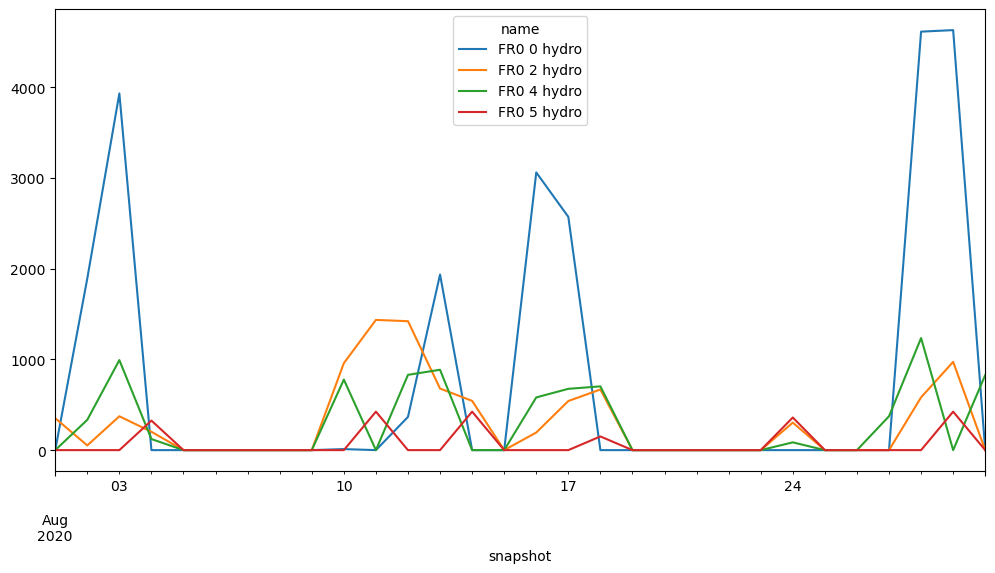

In [37]:
# generation time series for hydro power
hydro_generation = n.storage_units_t.p[
    n.storage_units[n.storage_units.carrier == "hydro"].index
]
hydro_generation.plot(figsize=(12, 6))

<Axes: xlabel='snapshot'>

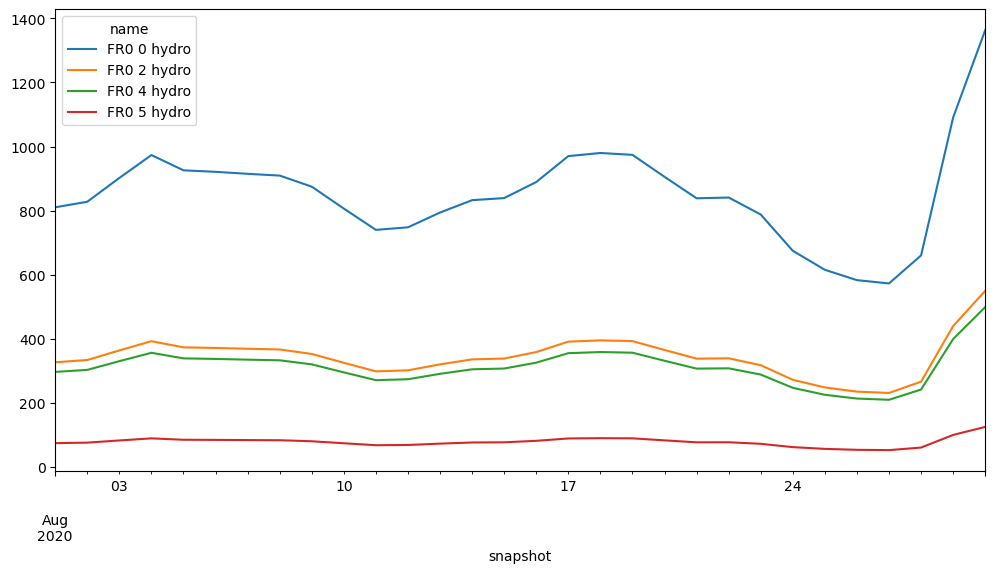

In [39]:
hydro_inflow = n.storage_units_t.inflow[
    n.storage_units[n.storage_units.carrier == "hydro"].index
]
hydro_inflow.plot(figsize=(12, 6))

<Axes: xlabel='snapshot'>

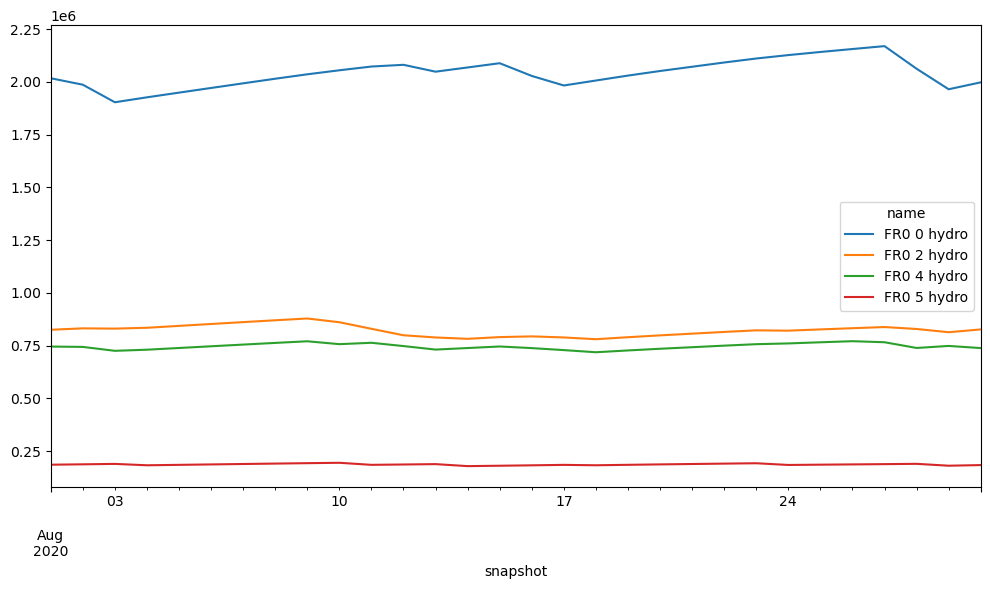

In [41]:
hydro_soc = n.storage_units_t.state_of_charge[
    n.storage_units[n.storage_units.carrier == "hydro"].index
]
hydro_soc.plot(figsize=(12, 6))

<Axes: xlabel='snapshot'>

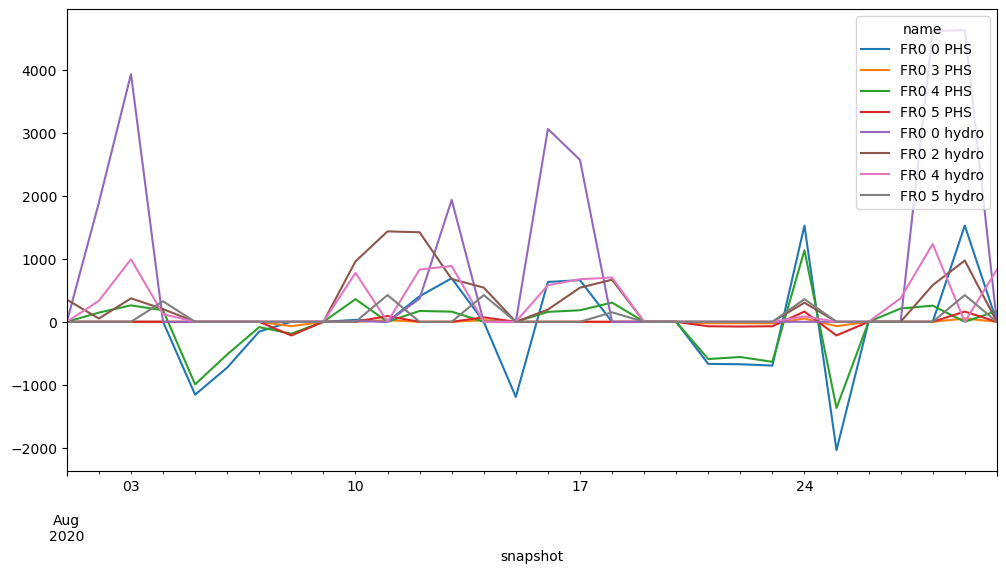

In [ ]:
hydro_and_phs_units = n.storage_units[
    n.storage_units.carrier.isin(["hydro", "PHS"])
].index

n.storage_units_t.p[hydro_and_phs_units].plot(figsize=(12, 6))